# GLAM

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rc('font', size=15)

In [3]:
def get_cov(k, br, kmin, kmax):
    # function to get covariance
    #
    # inputs
    #    k: wavenumber
    #    br: bispectrum or power spectrum ratio 
    #       (relative to the mean of the noBAO realizations)
    #
    is_good = np.ones(k.shape[0], '?')
    if len(k.shape) > 1:              # i.e., if the input is a B(k1, k2, k3)??
        for i in range(3):is_good &= (k[:, i] > kmin) & (k[:, i] < kmax)
    else:
        is_good &= (k > kmin) & (k < kmax)

    kg = k[is_good]
    bg = br[is_good].mean(axis=1)
    
    nbins, nmocks = br[is_good, :].shape
    hartlapf = (nmocks-1.0)/(nmocks-nbins-2.0)
    print(f'kmax={kmax}, kmin={kmin}, nbins={nbins}, nmocks={nmocks}')
    print(f'hartlap={hartlapf:.3f}')
    
    cov = np.cov(br[is_good, :], rowvar=True)*hartlapf / nmocks    
    return cov

## 1. Comparison of mean power spectrum and bispectrum

In [4]:
bk = np.load('glam_bk_0114.npz')
pk = np.load('glam_pk_0114.npz')

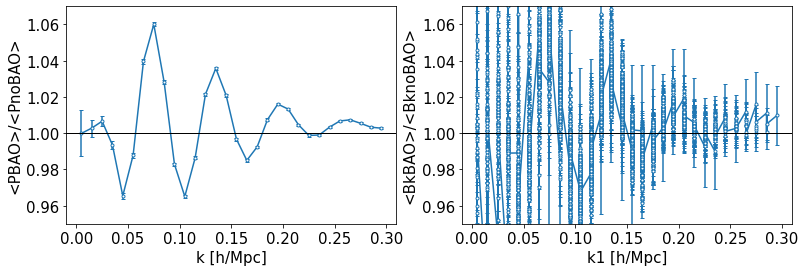

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(13, 4))

xlabels = ['k [h/Mpc]', 'k1 [h/Mpc]']
ylabels = ['<PBAO>/<PnoBAO>', '<BkBAO>/<BknoBAO>']

for i, y_i in enumerate([pk, bk]):

    k = y_i['k'] if i==0 else y_i['k'][:, 0]
    nmocks = y_i['bkr'].shape[1]
    
    ax[i].errorbar(k, y_i['bkr'].mean(axis=1), 
                   yerr=np.std(y_i['bkr'], axis=1)/np.sqrt(nmocks), 
                   marker='.', mfc='w', capsize=2)
    ax[i].axhline(1.0, color='k', lw=1, zorder=10)
    ax[i].set(xlabel=xlabels[i], ylabel=ylabels[i], ylim=(0.95, 1.07))

## 2. Comparison of covariance matrices

In [10]:
np.percentile(pk['k'], [0, 100])

array([0.005, 0.295])

In [12]:
kmin = 0.1
kmax = 0.15

cov_pk = get_cov(pk['k'], pk['bkr'], kmin, kmax)
cov_bk = get_cov(bk['k'], bk['bkr'], kmin, kmax)

kmax=0.15, kmin=0.1, nbins=5, nmocks=922
hartlap=1.007
kmax=0.15, kmin=0.1, nbins=35, nmocks=957
hartlap=1.039


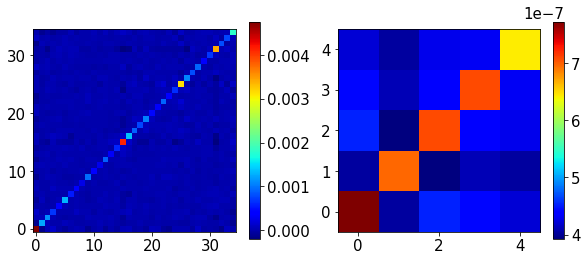

In [13]:
fg, ax = plt.subplots(ncols=2, figsize=(10, 4))

kw = dict(origin='lower', cmap='jet')
m1 = ax[0].imshow(cov_bk, **kw)
fg.colorbar(m1, ax=ax[0])

m2 = ax[1].imshow(cov_pk, **kw)
fg.colorbar(m2, ax=ax[1])

## NOTE: Old plots

In [12]:
pk = np.loadtxt('glam_pk_alphasnew.txt')
bk = np.loadtxt('glam_bk_alphasnew.txt')

[Text(0, 0.5, '$k_{\\rm max}$')]

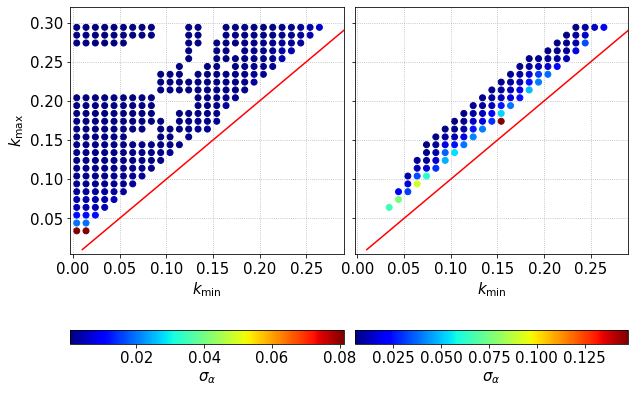

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 7), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.04)

for i, bk_i in enumerate([pk, bk]):
    im_i = ax[i].scatter(bk_i[:, 0], bk_i[:, 1], c=bk_i[:, 2], cmap='jet')
    fig.colorbar(im_i, ax=ax[i], orientation='horizontal', pad=0.2, label=r'$\sigma_{\alpha}$')
    
    ax[i].grid(True, ls=':')
    ax[i].plot([0.01, 0.3], [0.01, 0.3], 'r-')
    ax[i].set(xlim=[-0.003, 0.29], ylim=[0.004, 0.32], xlabel=r'$k_{\rm min}$')
    
ax[0].set(ylabel=r'$k_{\rm max}$')

[Text(0, 0.5, '$k_{\\rm max}$')]

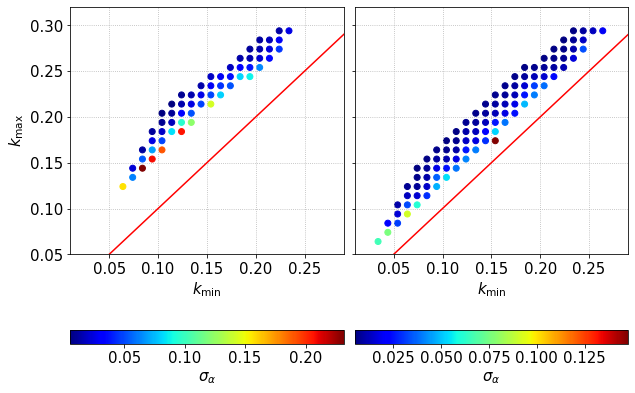

In [26]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 7), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.04)

for i, bk_i in enumerate([bk, bk2]):
    im_i = ax[i].scatter(bk_i[:, 0], bk_i[:, 1], c=bk_i[:, 2], cmap='jet')
    fig.colorbar(im_i, ax=ax[i], orientation='horizontal', pad=0.2, label=r'$\sigma_{\alpha}$')
    
    ax[i].grid(True, ls=':')
    ax[i].plot([0.01, 0.3], [0.01, 0.3], 'r-')
    ax[i].set(xlim=[0.01, 0.29], ylim=[0.05, 0.32], xlabel=r'$k_{\rm min}$')
    
ax[0].set(ylabel=r'$k_{\rm max}$')

(-0.015, 0.315, -0.015, 0.315)

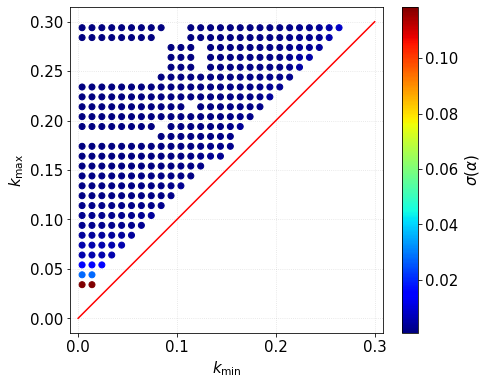

In [12]:
plt.figure(figsize=(7, 6))
plt.scatter(pk[:, 0], pk[:, 1], c=pk[:, 2], cmap='jet')

plt.colorbar(label=r'$\sigma (\alpha)$')
plt.grid(ls=':', alpha=0.4)
plt.xlabel(r'$k_{\rm min}$')
plt.ylabel(r'$k_{\rm max}$')
plt.plot([0.0, 0.3], [0.0, 0.3], 'r-')
plt.axis('equal')
# plt.xlim([0.05, 0.25])
# plt.ylim([0.1, 0.32])